In [44]:
import os, sys
import numpy as np
import pickle
import matplotlib.pyplot as plt

TARGET_POS = np.array([0.35, 0.05, 0.45])
# TARGET_POS = np.array([0.18, 0.18, 0.55])                 
          
l = 50
current_dir = './'

def load_data(data_path_dict):
    
    
    all_data_dict = {}
    for k, path in data_path_dict.items():
        
        # 0. dataset path
        dataset_dir = f'{current_dir}/replays/{path}'

        # 1. load episode ids...
        start_end_ids = np.sort(np.load(os.path.join(dataset_dir, "ep_start_end_ids.npy")), axis=-1)
        ep_start_end_ids = [[i*l, (i+1)*l-1] for i in range(100)]

        # 2. create dataset
        all_data = []
        for push_id in ep_start_end_ids:
            observations, actions, costs = [], [], []
            for step in range(push_id[0], push_id[1]+1):
                file_path = os.path.join(dataset_dir, f'frame_{step:06d}.npz')
                raw_data = np.load(file_path, allow_pickle=True)

                # process data
                obs_array = processed_obs(raw_data['robot_state'].item())
                action_array = raw_data['action'].item()['motion'][0]
                # action_array = processed_action(raw_data['action'].item(), obs_array)

                
                # save data
                observations.append(obs_array)
                actions.append(action_array) 
                costs.append((np.sqrt(np.sum(obs_array[:3]-TARGET_POS)**2)))

            observations = np.array(observations)
            actions = np.array(actions)
            costs = np.array(costs)

            data = {'observations': observations[:-1],
                    'next_observations': observations[1:], 
                    'actions': actions[:-1], 
                    'rewards': -costs[:-1], 
                    'costs': np.expand_dims(costs[:-1], axis=-1), 
                    'time_costs': 0.0*costs[:-1]}
            all_data.append(data)

    all_data_dict[k] = all_data
    return all_data_dict


def plot_results(all_restuls):
    
    # plots...
    fig, axes = plt.subplots(1, 3, figsize=(26, 8)) # 2*4 plots
    fig.subplots_adjust(left=0.05, bottom=0.132, top=0.95, right=0.98, wspace=0.22)

    
    # TODO: automatically
    total_time = 50.0 / 15.0
    real_time = np.linspace(0, total_time, 49)

    for k, values in all_results.items():
        
        # plot position
        observations = np.array([v['observations'][:, 0] for v in values]) # [num_runs, length] 
        o1 = np.mean(observations, axis=0)
        o2 = o1 + np.std(observations, axis=0) * 10
        o3 = o1 - np.std(observations, axis=0) * 10
        axes[0].plot(real_time, o1, linewidth=5, label=k)
        axes[0].fill_between(real_time, o3, o2, alpha=0.2) #, linewidth=5, label=k)
        axes[0].set_xlabel("Time (s)", fontsize=30)
        axes[0].set_ylabel("Position", fontsize=30)
        axes[0].tick_params(labelsize=20)
        axes[0].grid(visible=True, linestyle='--')
        axes[0].set_xlim((0, total_time))
#         axes[0].hlines(0.0, 0, 1.5, color='black', linewidth=2, alpha=0.5)

#         # %%
#         # plot angle
#         axes[1].plot(real_time, v['observations'][:, 1], linewidth=5, label=k)
#         axes[1].set_xlabel("Time (s)", fontsize=30)
#         axes[1].set_ylabel("Angle", fontsize=30)
#         axes[1].tick_params(labelsize=20)
#         axes[1].grid(visible=True, linestyle='--')
#         axes[1].set_xlim((0, 1.5)) 
#         axes[1].hlines(0.0, 0, 1.5, color='black', linewidth=2, alpha=0.5)

        # %%
        # plot control
        actions = np.array([v['actions'][:, 0] for v in values]) # [num_runs, length] 
        a1 = np.mean(actions, axis=0)
        axes[1].plot(real_time, a1, linewidth=5, label=k)
        axes[1].set_xlabel("Time (s)", fontsize=30)
        axes[1].set_ylabel("Control", fontsize=30)
        axes[1].tick_params(labelsize=20)
        axes[1].grid(visible=True, linestyle='--')
        axes[1].set_xlim((0, total_time))
#         axes[1].hlines(0.0, 0, 1.5, color='black', linewidth=2, alpha=0.5)

        # %%
        # plot costs
        costs = np.array([-v['rewards'] for v in values]) # [num_runs, length] 
        c1 = np.mean(costs, axis=0)
        axes[2].plot(real_time, c1, linewidth=5, label=k)
        axes[2].set_xlabel("Time (s)", fontsize=30)
        axes[2].set_ylabel("Cost", fontsize=30)
        axes[2].tick_params(labelsize=20)
        axes[2].grid(visible=True, linestyle='--')
        axes[2].set_xlim((0, total_time))
        axes[2].legend(fontsize=30, loc='lower left')
#         axes[2].hlines(0.0, 0, 1.5, color='black', linewidth=2, alpha=0.5)

#     plt.savefig(f'imperfect_expert.pdf')

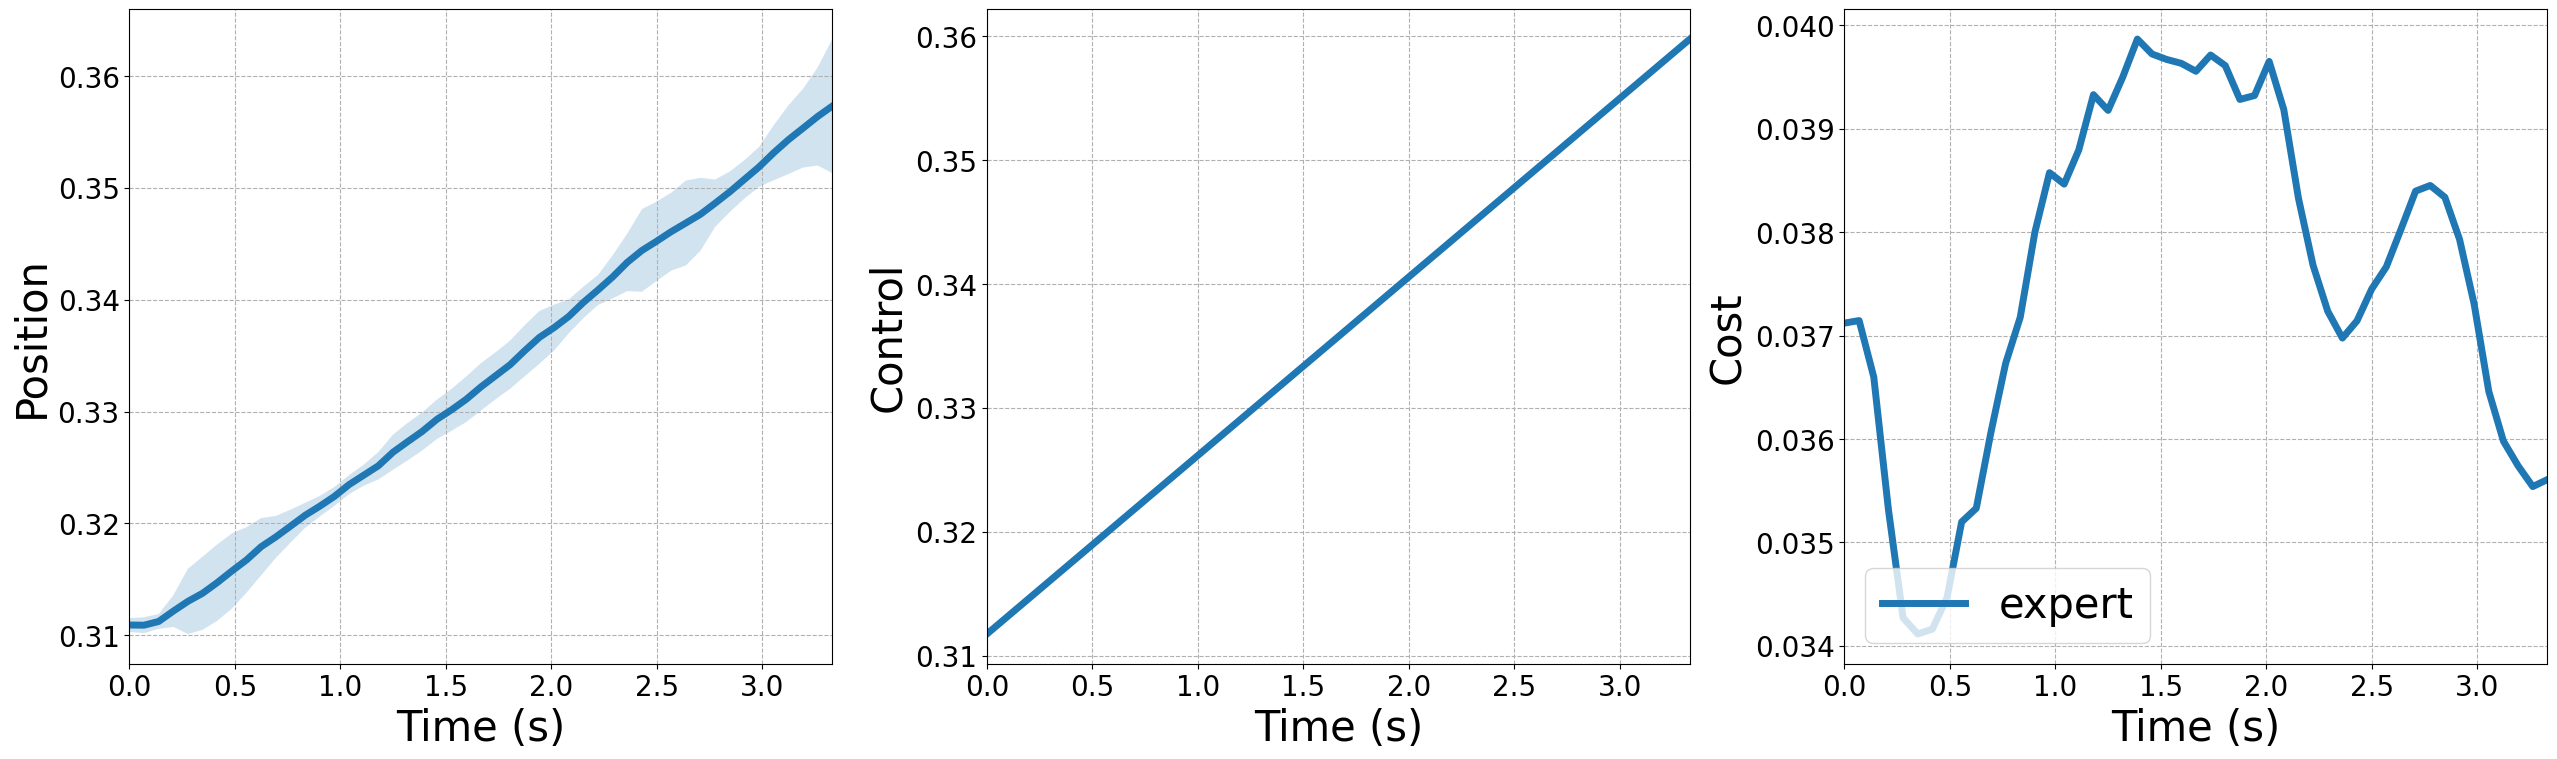

In [45]:
# all_results = load_data({'expert': 'move_test_rerun'})

plot_results(all_results)

